https://stackoverflow.com/questions/51675151/df-x-unique-and-typeerror-unhashable-type-numpy-ndarray


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
appl = pd.read_csv("../Credit-Card-Prediction/application_record.csv", sep=",")
balance = pd.read_csv("./credit_record.csv", sep=",")

In [3]:
print(appl.shape)
appl = appl.drop_duplicates(subset=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','OCCUPATION_TYPE'],
                    keep='first')
print(appl.shape)

(438557, 18)
(89921, 18)


In [ ]:
appl[appl["ID"]>=5008810]

In [ ]:
balance[balance['ID']==5001711]

In [4]:
#balance_v2= balance.groupby(['ID'],as_index=False).agg({'STATUS':pd.Series.mode})
balance_v2= balance.groupby(['ID'],as_index=False).agg({'STATUS': lambda x: pd.Series.mode(x)[0][0]})

#balance_v2['ID'].apply(lambda x: str(x)).unique()
balance_v2.nunique()

#balance_v2 = balance.copy()

ID        45985
STATUS        6
dtype: int64

In [5]:
balance_v2['STATUS'].unique()

array(['0', 'X', 'C', '1', '5', '2'], dtype=object)

In [6]:
Estado=[]

for row in balance_v2['STATUS']:
    if row == 'C' : Estado.append(1) #Pagado
    elif row == 'X' : Estado.append(2) # Sin Deuda
    else:  Estado.append(0) #En Mora
balance_v2["Estado"]=Estado
balance_v2

,ID,STATUS,Estado
0,5001711,0,0
1,5001712,0,0
2,5001713,X,2
3,5001714,X,2
4,5001715,X,2
...,...,...,...
45980,5150482,0,0
45981,5150483,X,2
45982,5150484,0,0
45983,5150485,0,0


<AxesSubplot:xlabel='STATUS', ylabel='count'>

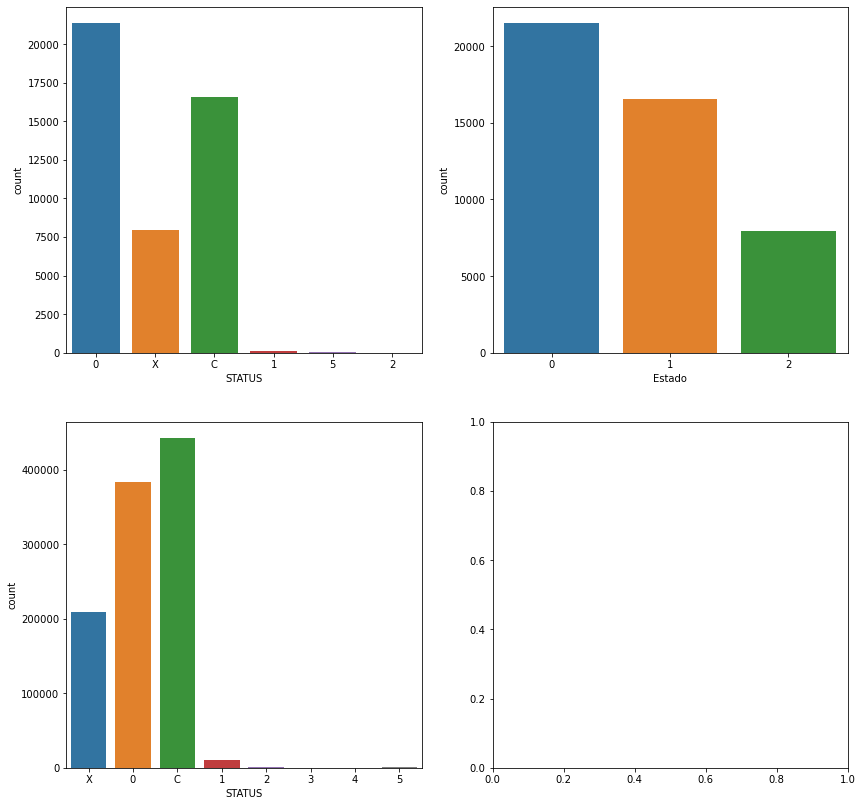

In [7]:
#balance_v2['STATUS'].value_counts().plot(kind='bar')
f,axes =plt.subplots(2,2,figsize=(14,14))

sns.countplot(x="STATUS", data=balance_v2,ax=axes[0,0])
sns.countplot(x="Estado", data=balance_v2,ax=axes[0,1])

sns.countplot(x="STATUS", data=balance,ax=axes[1,0])

In [8]:
print (balance_v2['STATUS'].unique())
balance_v2 = balance_v2.drop(balance_v2[balance_v2.STATUS == 'X'].index) #Eliminamos 'NO LOAN FOR THE MONTH'
print (balance_v2['STATUS'].unique())
print (balance_v2['Estado'].unique())

['0' 'X' 'C' '1' '5' '2']
['0' 'C' '1' '5' '2']
[0 1]


# Merge dataframes

In [9]:
print (len(set(appl['ID']))) # how many unique ID in application record?
print (len(set(balance['ID']))) # how many unique ID in credit record?
print (len(set(appl['ID']).intersection(set(balance['ID'])))) # how many IDs do two tables share?
print (len(set(appl['ID']).intersection(set(balance_v2['ID'])))) # how many IDs do two tables share?

89921
45985
9698
8129


In [10]:
data = appl.merge(balance_v2, on="ID", validate="one_to_one")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Estado
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,C,1
1,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,0,0
2,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,0
3,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,0,0
4,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8124,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,1,0,0,0,Laborers,2.0,0,0
8125,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,1,0,NaN,2.0,C,1
8126,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,0,0
8127,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,C,1


# Analisis de Datos 

In [ ]:
#data.select_dtypes(include=['float64'])int64
for i in data.columns[data.dtypes == 'float64']:
    print(i)

In [11]:
pd.set_option('precision',2)
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Estado
count,8.13e+03,8129.00,8.13e+03,8129.00,8129.00,8129.0,8129.00,8129.00,8129.00,8129.00,8129.00
mean,5.08e+06,0.42,1.81e+05,-16007.94,61956.43,1.0,0.21,0.28,0.09,2.19,0.43
std,4.11e+04,0.77,9.92e+04,4250.90,139852.54,0.0,0.41,0.45,0.28,0.93,0.50
min,5.01e+06,0.00,2.70e+04,-25152.00,-15713.00,1.0,0.00,0.00,0.00,1.00,0.00
25%,5.04e+06,0.00,1.12e+05,-19580.00,-2988.00,1.0,0.00,0.00,0.00,2.00,0.00
50%,5.07e+06,0.00,1.58e+05,-15687.00,-1371.00,1.0,0.00,0.00,0.00,2.00,0.00
75%,5.11e+06,1.00,2.25e+05,-12442.00,-340.00,1.0,0.00,1.00,0.00,3.00,1.00
max,5.15e+06,19.00,1.58e+06,-7705.00,365243.00,1.0,1.00,1.00,1.00,20.00,1.00


In [12]:
print (data.groupby('STATUS').size()) #Saber cuantas instancias tenemos en las clases
print (data.groupby('Estado').size())
#data.groupby(['Estado','OCCUPATION_TYPE']).size()#Saber cuantas instancias tenemos en las clases

STATUS
0    4584
1      27
5      14
C    3504
dtype: int64
Estado
0    4625
1    3504
dtype: int64


In [13]:
#Saber cuantos valor NaN existen en cada caracteristica:
data.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        2532
CNT_FAM_MEMBERS           0
STATUS                    0
Estado                    0
dtype: int64

In [14]:
#Sabes de que tipo es cada caracterisitica
#dataset.info()
(data==0).sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN           5703
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE        6387
FLAG_PHONE             5817
FLAG_EMAIL             7437
OCCUPATION_TYPE           0
CNT_FAM_MEMBERS           0
STATUS                    0
Estado                 4625
dtype: int64

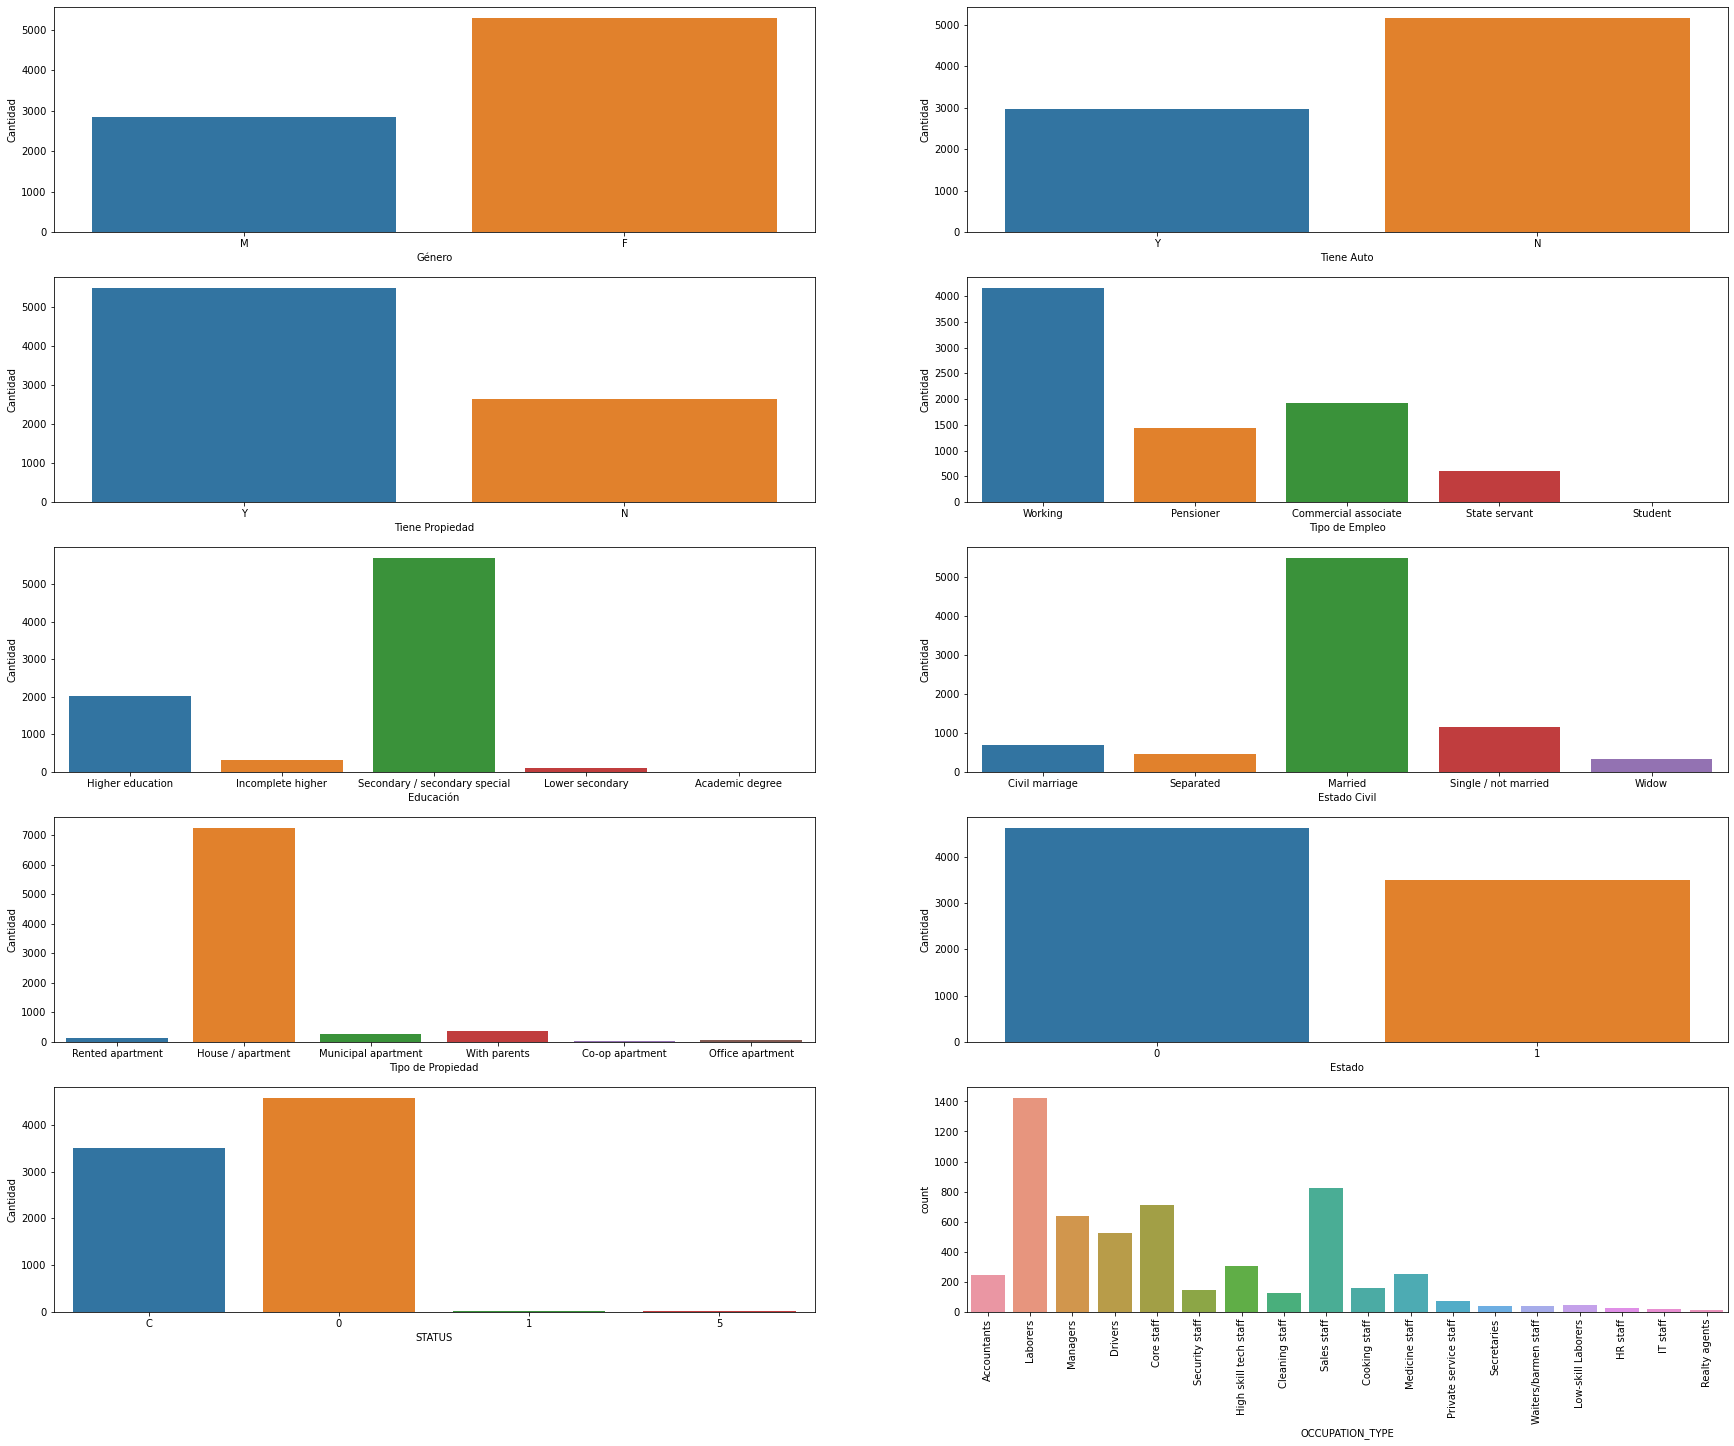

In [15]:
f,axes =plt.subplots(5,2,figsize=(30,24))

sns.countplot(x="CODE_GENDER", data=data,ax=axes[0,0]).set(xlabel='Género', ylabel='Cantidad')
sns.countplot(x="FLAG_OWN_CAR", data=data,ax=axes[0,1]).set(xlabel='Tiene Auto', ylabel='Cantidad')
sns.countplot(x="FLAG_OWN_REALTY", data=data,ax=axes[1,0]).set(xlabel='Tiene Propiedad', ylabel='Cantidad')
sns.countplot(x="NAME_INCOME_TYPE", data=data,ax=axes[1,1]).set(xlabel='Tipo de Empleo', ylabel='Cantidad')
sns.countplot(x="NAME_EDUCATION_TYPE", data=data,ax=axes[2,0]).set(xlabel='Educación', ylabel='Cantidad')
sns.countplot(x="NAME_FAMILY_STATUS", data=data,ax=axes[2,1]).set(xlabel='Estado Civil', ylabel='Cantidad')
sns.countplot(x="NAME_HOUSING_TYPE", data=data,ax=axes[3,0]).set(xlabel='Tipo de Propiedad', ylabel='Cantidad')
sns.countplot(x="Estado", data=data,ax=axes[3,1]).set(xlabel='Estado', ylabel='Cantidad')
sns.countplot(x="STATUS", data=data,ax=axes[4,0]).set(xlabel='STATUS', ylabel='Cantidad')
sns.countplot(x="OCCUPATION_TYPE", data=data,ax=axes[4,1]).tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

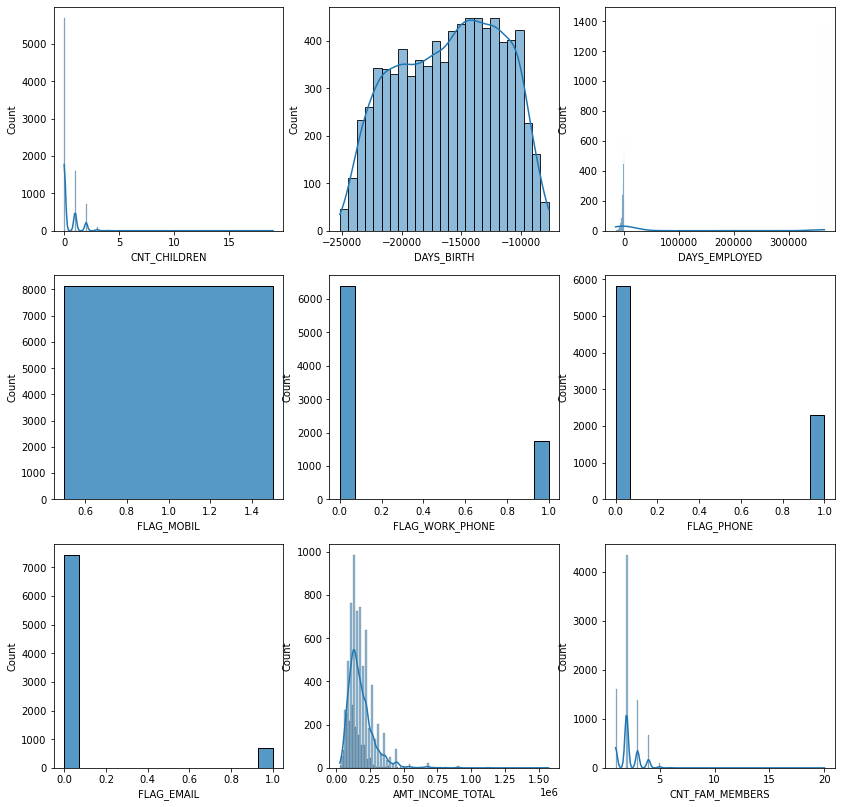

In [16]:
# Univariate Histograms
f,axes =plt.subplots(3,3,figsize=(14,14))
sns.histplot(data['CNT_CHILDREN'], ax=axes[0,0], kde=True)
sns.histplot(data['DAYS_BIRTH'], ax=axes[0,1], kde=True)
sns.histplot(data['DAYS_EMPLOYED'], ax=axes[0,2], kde=True)
sns.histplot(data['FLAG_MOBIL'], ax=axes[1,0])
sns.histplot(data['FLAG_WORK_PHONE'], ax=axes[1,1])
sns.histplot(data['FLAG_PHONE'], ax=axes[1,2])
sns.histplot(data['FLAG_EMAIL'], ax=axes[2,0])
sns.histplot(data['AMT_INCOME_TOTAL'], ax=axes[2,1], kde=True)
sns.histplot(data['CNT_FAM_MEMBERS'], ax=axes[2,2], kde=True)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

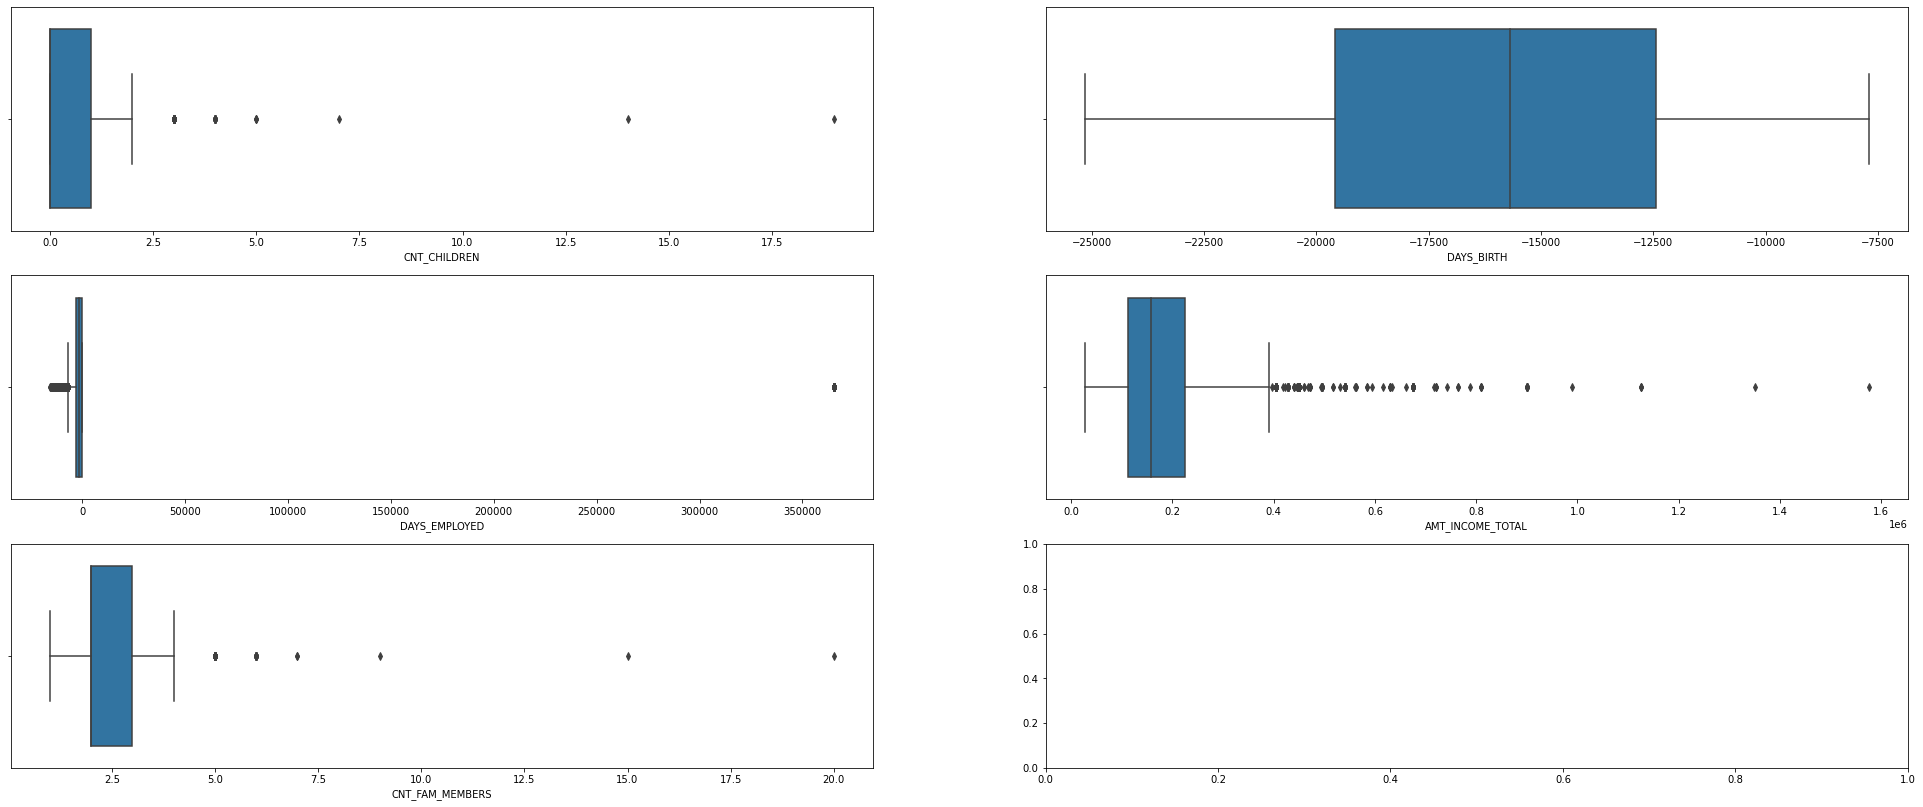

In [17]:
f,axes =plt.subplots(3,2,figsize=(34,14))
sns.boxplot(x=data['CNT_CHILDREN'], ax=axes[0,0])
sns.boxplot(x=data['DAYS_BIRTH'], ax=axes[0,1])
sns.boxplot(x=data['DAYS_EMPLOYED'], ax=axes[1,0])
sns.boxplot(x=data['AMT_INCOME_TOTAL'], ax=axes[1,1])
sns.boxplot(x=data['CNT_FAM_MEMBERS'], ax=axes[2,0])

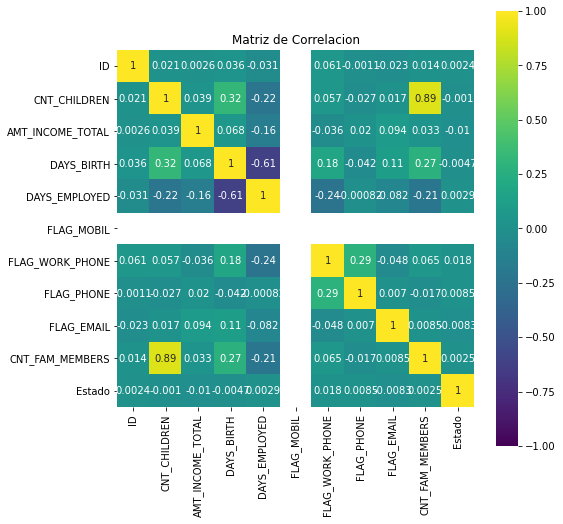

In [18]:
corr = data.corr()
fig=plt.figure(figsize=(8,8))
ax=sns.heatmap(corr,vmax=1,vmin=-1, square=True, annot=True,cmap='viridis')#Funcion para la correlacion
plt.title("Matriz de Correlacion")
plt.show()

421
422
423
424
425


<Figure size 432x288 with 0 Axes>

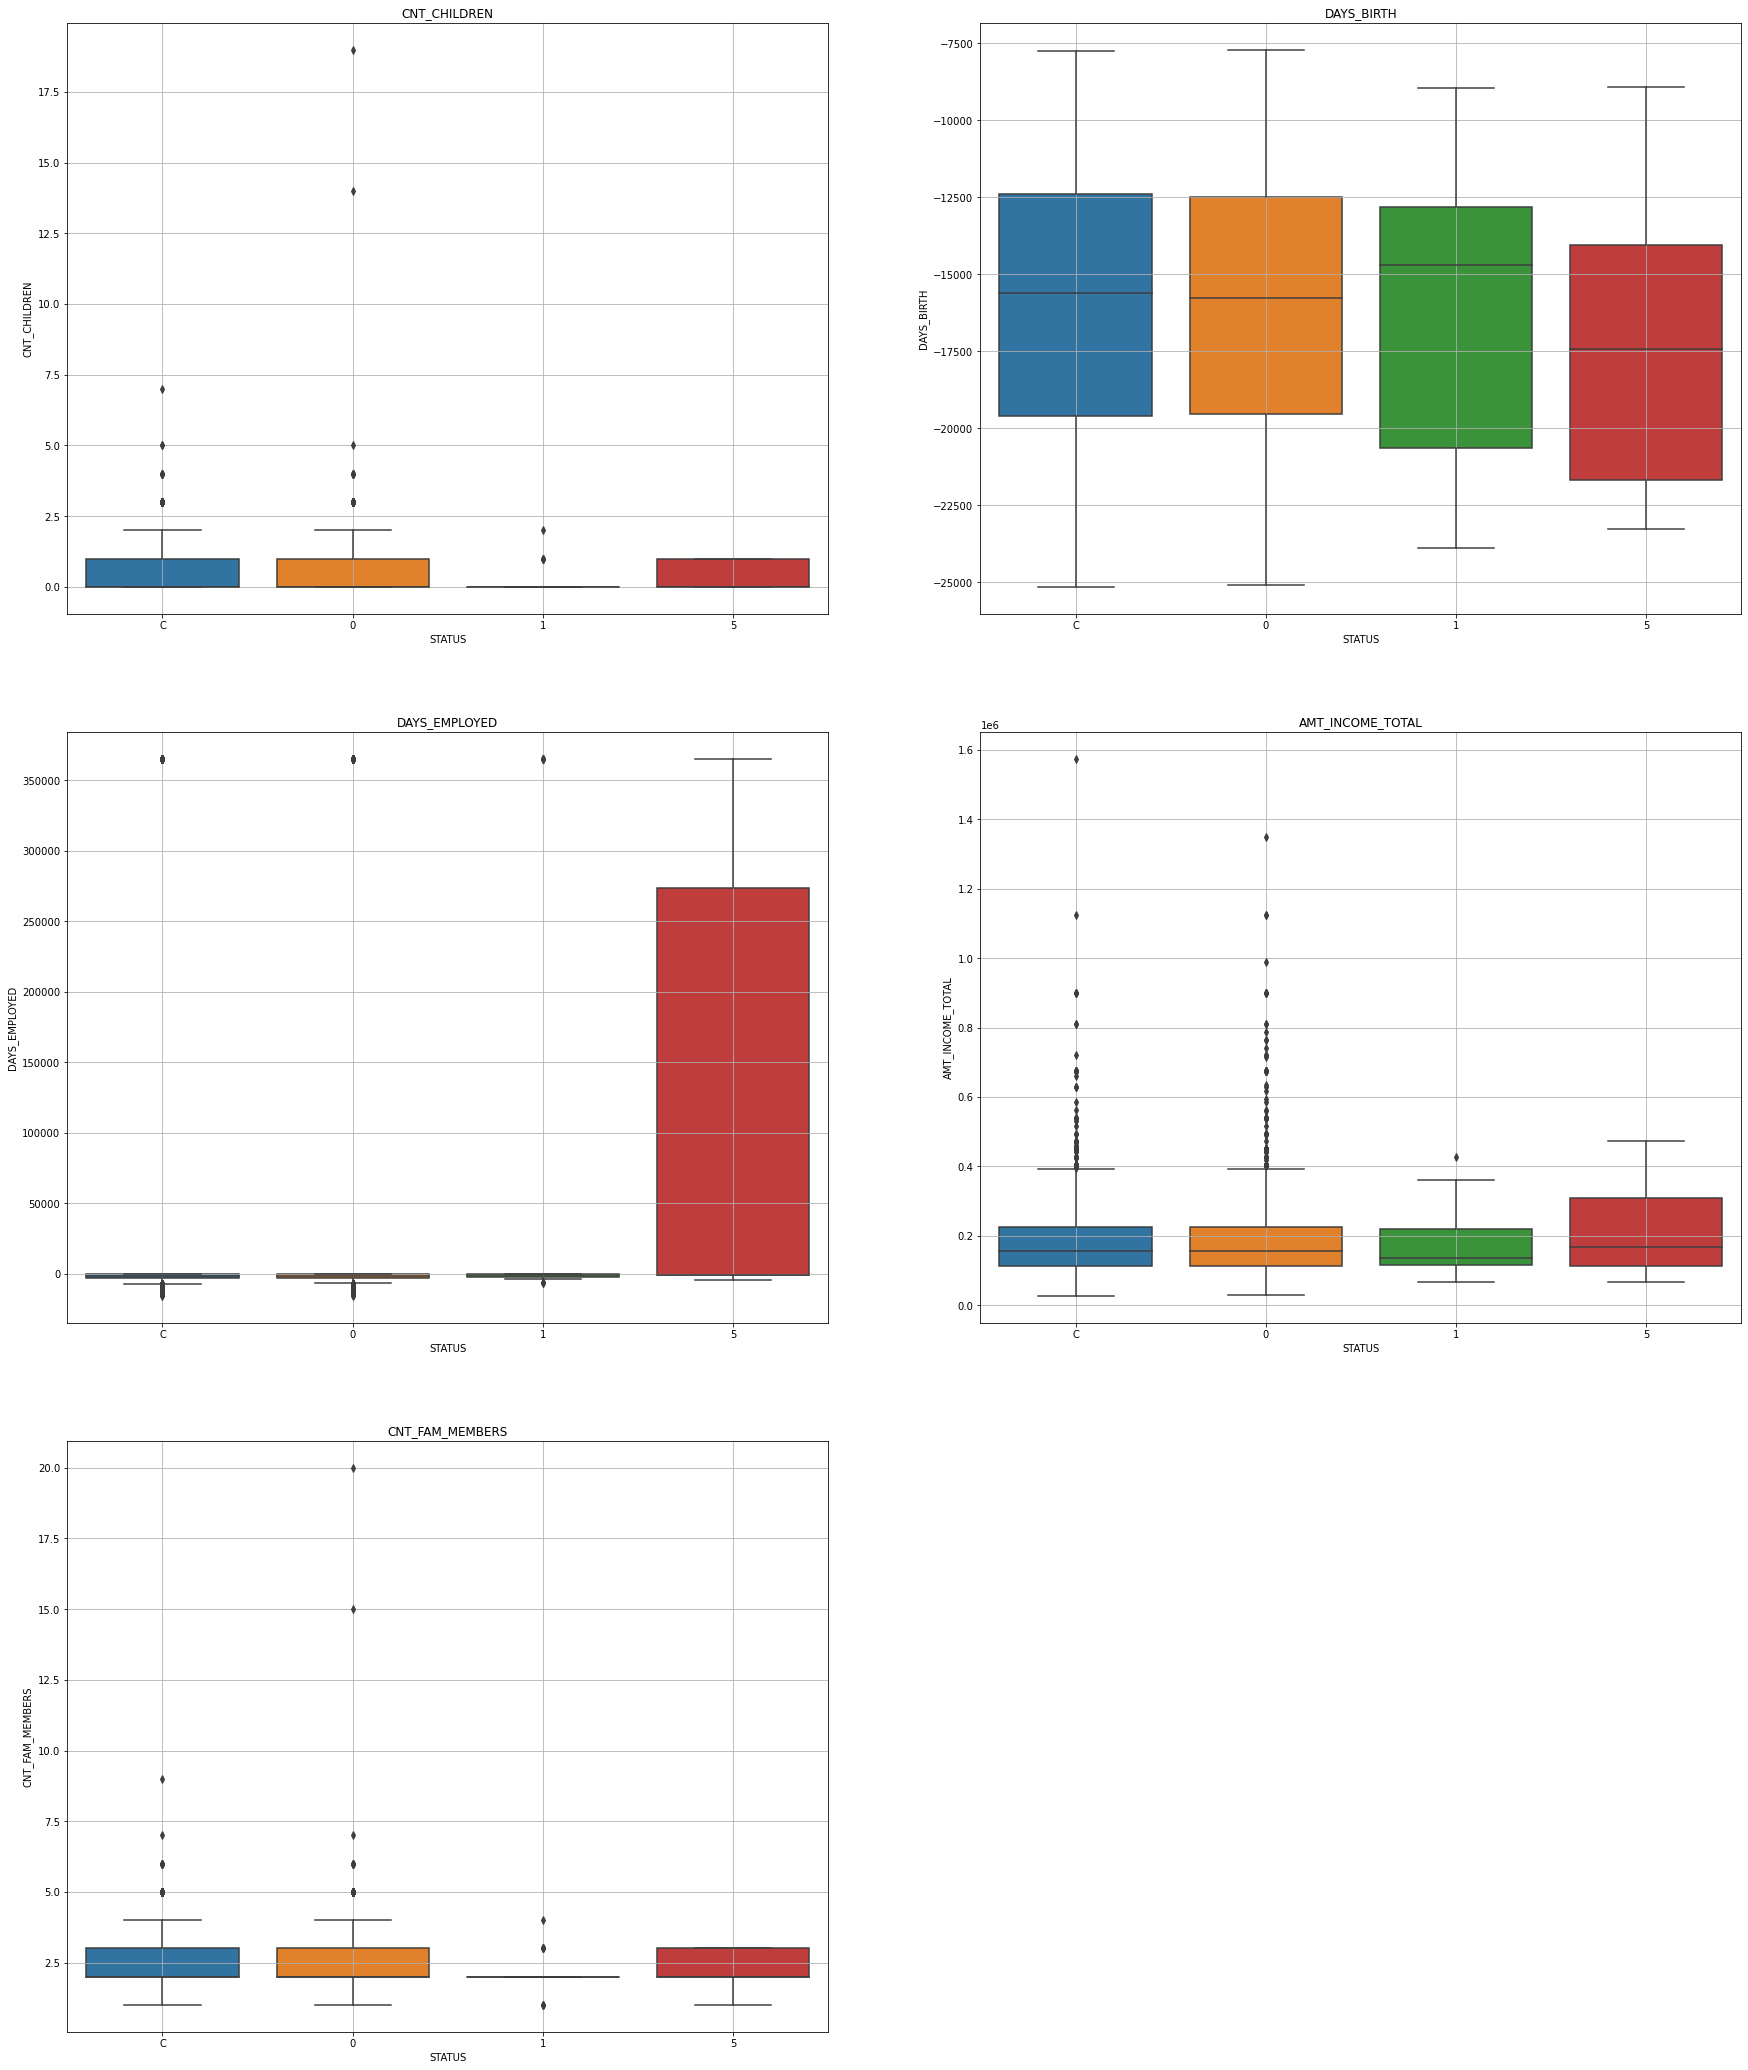

In [19]:
plt.figure(1)
plt.subplots(figsize=(30,50))
name=['CNT_CHILDREN' , 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']

id=421
for t in name:
    plt.subplot(id)#identificador
    print(id)
    sns.boxplot(x='STATUS', y=t,data=data)
    plt.title(t)
    plt.grid(True)
    id +=1
plt.show()

In [ ]:
# Correlatioin matrix Seaborn
sns.pairplot(data)

In [ ]:
sns.pairplot(data,hue='Estado', diag_kind='hist')

In [21]:
data.to_csv("Base Moda.csv", index=False, encoding='utf-8')